# Python для анализа данных

*Алла Тамбовцева, НИУ ВШЭ*

## Web-scraping

Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [1]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [2]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [3]:
page  # response 200 - страница загружена

<Response [200]>

In [4]:
# page.text

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [4]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [5]:
soup = BeautifulSoup(page.text, 'html')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [7]:
# soup

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [8]:
# print(soup.prettify())

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).


Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [6]:
for link in soup.find_all('a'):
    print(link.get('href'))
#     break

/search
https://offline.nplus1.ru/
https://nplus.pro/
https://nplus1.ru/about
https://nplus1.ru/difficult
https://nplus1.ru/adv
https://nplus1.ru/blog/2022/04/01/samotek
https://nplus1.ru/search?tags=946
https://nplus1.ru/search?tags=869
https://nplus1.ru/search?tags=874
https://nplus1.ru/search?tags=880
https://nplus1.ru/search?tags=768
https://nplus1.ru/search?tags=890
https://nplus1.ru/search?tags=871
https://nplus1.ru/search?tags=876
https://nplus1.ru/search?tags=775
https://nplus1.ru/search?tags=767
https://nplus1.ru/search?tags=771
https://nplus1.ru/search?tags=772
https://nplus1.ru/search?tags=778
https://nplus1.ru/search?tags=917
https://nplus1.ru/search?tags=918
https://nplus1.ru/search?tags=824
https://t.me/nplusone
https://vk.com/nplusone
https://ok.ru/nplus1
https://twitter.com/nplusodin
https://nplus1.ru/about
https://nplus1.ru/difficult
https://nplus1.ru/adv
https://nplus1.ru/news/2015/09/21/editor-thy-name
https://nplus1.ru/search?tags=946
https://nplus1.ru/search?tags=8

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [7]:
# urls = []

# for link in soup.find_all('a'):
#     if '/news' in link.get('href'):
#         urls.append('https://nplus1.ru'+link.get('href'))

urls = [link.get('href') 
        for link in soup.find_all('a') 
        if 'https://nplus1.ru/news/2023' in link.get('href')]

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [8]:
urls[:5]

['https://nplus1.ru/news/2023/10/03/phys-nobel-2023',
 'https://nplus1.ru/news/2023/10/04/neolithic-jericho',
 'https://nplus1.ru/news/2023/10/04/we-drive-solar-sharing-batteries',
 'https://nplus1.ru/news/2023/10/04/orca-vs-sea-otters',
 'https://nplus1.ru/news/2023/10/03/wolves-love-story']

In [9]:
full_urls = []

for u in urls:
    res = 'https://nplus1.ru' + u
    full_urls.append(res) 

full_urls

['https://nplus1.ruhttps://nplus1.ru/news/2023/10/03/phys-nobel-2023',
 'https://nplus1.ruhttps://nplus1.ru/news/2023/10/04/neolithic-jericho',
 'https://nplus1.ruhttps://nplus1.ru/news/2023/10/04/we-drive-solar-sharing-batteries',
 'https://nplus1.ruhttps://nplus1.ru/news/2023/10/04/orca-vs-sea-otters',
 'https://nplus1.ruhttps://nplus1.ru/news/2023/10/03/wolves-love-story',
 'https://nplus1.ruhttps://nplus1.ru/news/2023/10/03/bivalve-cancer',
 'https://nplus1.ruhttps://nplus1.ru/news/2023/10/03/butterflies-plugs',
 'https://nplus1.ruhttps://nplus1.ru/news/2023/10/03/gwas-carrot',
 'https://nplus1.ruhttps://nplus1.ru/news/2023/10/03/phys-nobel-2023',
 'https://nplus1.ruhttps://nplus1.ru/news/2023/10/03/yamnaya-people-and-multiple-sclerosis',
 'https://nplus1.ruhttps://nplus1.ru/news/2023/10/03/viking-age-burial-in-garden',
 'https://nplus1.ruhttps://nplus1.ru/news/2023/10/03/music-reading-dementia',
 'https://nplus1.ruhttps://nplus1.ru/news/2023/10/03/gobekli-tepe',
 'https://nplus1.r

In [10]:
urls

['https://nplus1.ru/news/2023/10/03/phys-nobel-2023',
 'https://nplus1.ru/news/2023/10/04/neolithic-jericho',
 'https://nplus1.ru/news/2023/10/04/we-drive-solar-sharing-batteries',
 'https://nplus1.ru/news/2023/10/04/orca-vs-sea-otters',
 'https://nplus1.ru/news/2023/10/03/wolves-love-story',
 'https://nplus1.ru/news/2023/10/03/bivalve-cancer',
 'https://nplus1.ru/news/2023/10/03/butterflies-plugs',
 'https://nplus1.ru/news/2023/10/03/gwas-carrot',
 'https://nplus1.ru/news/2023/10/03/phys-nobel-2023',
 'https://nplus1.ru/news/2023/10/03/yamnaya-people-and-multiple-sclerosis',
 'https://nplus1.ru/news/2023/10/03/viking-age-burial-in-garden',
 'https://nplus1.ru/news/2023/10/03/music-reading-dementia',
 'https://nplus1.ru/news/2023/10/03/gobekli-tepe',
 'https://nplus1.ru/news/2023/10/03/loneliness-and-risk-of-pd',
 'https://nplus1.ru/news/2023/10/03/jwst-m-42',
 'https://nplus1.ru/news/2023/10/03/baby-beaver',
 'https://nplus1.ru/news/2023/10/02/nitrogen-fertilisers',
 'https://nplus1.r

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [11]:
url0 = urls[0]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'html')

In [12]:
url0

'https://nplus1.ru/news/2023/10/03/phys-nobel-2023'

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [13]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="#f26e40" name="msapplication-TileColor"/>,
 <meta content="#ffffff" name="theme-color"/>,
 <meta content="8c90b02c84ac3b72" name="yandex-verification"/>,
 <meta content="b419949322895fc9106e24ed01be58ac" name="pmail-verification"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" name="description"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" property="og:site_name"/>,
 <meta content="Нобелевскую премию по физике присудили за аттосекундные импульсы" property="og:title"/>,
 <meta content="https://minio.nplus1.ru/app-images/838952/6516cd10c8cc8_cover_share.jpg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2023/10/03/phys-nobel-2023" property="og:url"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" property="og:description"/>,
 <meta content="article" property="og:type"/>,
 <meta 

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [14]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Александр Дубов" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [15]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Александр Дубов" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [16]:
soup0.find_all('meta', {'name' : 'author'})[0].get('content')

'Александр Дубов'

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [17]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs
author

{'name': 'author', 'content': 'Александр Дубов'}

Аналогичным образом извлечем дату, заголовок и описание.

In [18]:
soup0.find_all('meta', {'property' : 'og:title'})[0].get('content')

'Нобелевскую премию по\xa0физике присудили за\xa0аттосекундные импульсы'

In [19]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].get('content')
title = soup0.find_all('meta', {'property' : 'og:title'})[0].get('content')
description = soup0.find_all('h1', {'class':'text-34 md:text-42 xl:text-52 break-words'})[0].get_text().strip() \
+ '\n' + soup0.find_all('p', {'class':"text-36 md:text-44 xl:text-54 font-spectral text-main-gray mb-6"})[0].get_text().strip()



In [20]:
description

'Нобелевскую премию по\xa0физике присудили за\xa0аттосекундные импульсы\nЛауреатами стали Пьер Агостини, Ференц Краус и\xa0Анн Л\x92Юилье'

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [21]:
new_data = soup0.find_all('div', {'class':"flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})[0].find_all('span')[1:]

time_published = new_data[0].get_text()
date_published = new_data[1].get_text()
complexity = new_data[2].get_text()
themes = ', '.join(i.get_text() for i in new_data[3:])

In [22]:
paragraphs = soup0.find_all('p', {'class': 'mb-6'})[1:]


In [23]:
links = set()
for p in paragraphs:
    links|={i.get('href') for i in p.find_all('a')}
links = ', '.join(links)

In [24]:
full_text = '\n'.join([p.get_text() for p in paragraphs])

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [27]:
def GetNews(url0):
    """
    Returns a tuple with 
    url0, date_published, time_published, author, description, title, complexity, themes, links,full_text
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    
    author = soup0.find_all('meta', {'name' : 'author'})[0].get('content')
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].get('content')
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].get('content')
    description = soup0.find_all('h1', {'class':'text-34 md:text-42 xl:text-52 break-words'})[0].get_text().strip() \
+ '\n' + soup0.find_all('p', {'class':"text-36 md:text-44 xl:text-54 font-spectral text-main-gray mb-6"})[0].get_text().strip()


    
    new_data = soup0.find_all('div', {'class':"flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})[0].find_all('span')[1:]

    time_published = new_data[0].get_text()
    date_published = new_data[1].get_text()
    complexity = new_data[2].get_text()
    themes = ', '.join(i.get_text() for i in new_data[3:])
    
    paragraphs = soup0.find_all('p', {'class': 'mb-6'})[1:]
    links = set()
    for p in paragraphs:
        links|={i.get('href') for i in p.find_all('a')}
    links -= {None} # Если вдруг у нас есть None-ссылка
    links = {''} if not links else links
    links = ', '.join(links)
    full_text = '\n'.join([p.get_text() for p in paragraphs])
    
    return url0, date_published, time_published, author, description, title, complexity, themes, links,full_text

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [28]:
from time import sleep
from tqdm import tqdm

In [29]:
import random

In [30]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in tqdm(urls):
    res = GetNews(link)
    news.append(res)
    sleep(random.random()) # задержка в 3 секунды

100%|██████████████████████████████████████████████████████████████████████████████████| 55/55 [01:46<00:00,  1.93s/it]


In [32]:
urls[50]

'https://nplus1.ru/news/2023/09/22/topological-phonons-in-graphene'

In [34]:
page0 = requests.get(urls[50])
soup0 = BeautifulSoup(page0.text, 'lxml')

In [35]:
paragraphs = soup0.find_all('p', {'class': 'mb-6'})[1:]

In [36]:
links = set()
for p in paragraphs:
    links|={i.get('href') for i in p.find_all('a')}

In [37]:
links - {None}

{'https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.131.116602',
 'https://nplus1.ru/material/2022/05/20/magic-graphene',
 'https://nplus1.ru/news/2018/01/15/phonon-topological-insulator',
 'https://nplus1.ru/news/2018/02/02/chiral-phonons',
 'https://pubs.aip.org/aip/apr/article/9/4/041304/2835337/Topological-nodal-line-phonons-Recent-advances-in',
 'https://ru.wikipedia.org/wiki/%D0%A4%D0%BE%D0%BD%D0%BE%D0%BD'}

Так теперь выглядит первый элемент списка:

In [39]:
news[0]

('https://nplus1.ru/news/2023/10/03/phys-nobel-2023',
 '03.10.23',
 '12:54',
 'Александр Дубов',
 'Нобелевскую премию по\xa0физике присудили за\xa0аттосекундные импульсы\nЛауреатами стали Пьер Агостини, Ференц Краус и\xa0Анн Л\x92Юилье',
 'Нобелевскую премию по\xa0физике присудили за\xa0аттосекундные импульсы',
 '3.6',
 'Физика',
 'https://pubmed.ncbi.nlm.nih.gov/11387467/, https://t.co/vXkuzBQkfK, https://nplus1.ru/news/2022/01/27/ionization-entanglement, https://nplus1.ru/blog/2023/09/20/clarivate-nobel-2023, https://www.nobelprize.org, https://iopscience.iop.org/article/10.1088/0953-4075/21/3/001, https://nplus1.ru/material/2022/10/04/physics-nobel-2022, https://pubmed.ncbi.nlm.nih.gov/11734845/, https://nplus1.ru/material/2021/10/06/nobel-physics-2021-exp',
 'Нобелиатами по\xa0физике в\xa02023 году стали Пьер Агостини (Pierre Agostini), Ференц Краус (Ferenc Krausz) и\xa0Анн Л’Юилье (Anne L’Huillier)\xa0— за\xa0экспериментальные методы генерации аттосекундных импульсов для изучения 

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [61]:
import pandas as pd

In [62]:
df = pd.DataFrame(news)

In [63]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9
0,https://nplus1.ru/news/2023/10/03/phys-nobel-2023,03.10.23,12:54,Александр Дубов,Нобелевскую премию по физике присудили за атто...,Нобелевскую премию по физике присудили за атто...,3.6,Физика,"https://pubmed.ncbi.nlm.nih.gov/11387467/, htt...",Нобелиатами по физике в 2023 году стали Пьер А...
1,https://nplus1.ru/news/2023/10/04/neolithic-je...,04.10.23,10:37,Михаил Подрезов,Среди 44 жителей Иерихона эпохи докерамическог...,Среди 44 жителей Иерихона эпохи докерамическог...,2.9,"Антропология, Археология",https://en.wikipedia.org/wiki/Tower_of_Jericho...,Группа ученых исследовала 52 человеческих зуба...


Переименуем столбцы в базе.

In [64]:
df.columns = ['url', 'date_published', 'time_published', 'author', 'description', 'title', 'complexity', 'themes', 'links','full_text']

Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [65]:
df['complexity'] = df['complexity'].apply(float)

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [66]:
df.complexity.describe()

count    55.000000
mean      3.276364
std       1.721430
min       1.100000
25%       1.900000
50%       3.100000
75%       4.450000
max       7.800000
Name: complexity, dtype: float64

In [67]:
from matplotlib.cbook import flatten

In [68]:
sorted(set(flatten([i.split(', ') for i in df.themes.unique()])))

['Антропология',
 'Археология',
 'Астрономия',
 'Биология',
 'Ботаника',
 'Геология',
 'Зоология',
 'Инфопартнерство',
 'История',
 'Космонавтика',
 'Лингвистика',
 'Медицина',
 'Роботы и дроны',
 'Технологии',
 'Транспорт',
 'Физика',
 'Химия',
 'Экология и климат']

In [69]:
df[df.themes.apply(lambda x: 'зоология' in x.lower())].sample(1).full_text.values[0]

'Суперконтинент Пангея Ультима, в\xa0который соединятся материки через 250 миллионов лет, будет непригоден для обитания млекопитающих. Средняя температура воздуха над ним резко вырастет, и\xa0его климат станет слишком континентальным из-за слияния континентов, роста концентрации углекислого газа и\xa0величины солнечной постоянной. Такие прогнозы содержит исследование, опубликованное в\xa0журнале Nature Geoscience.\nМлекопитающие появились на\xa0Земле приблизительно 310 миллионов лет назад, но\xa0стали доминирующим классом животных только после мел-палеогенового вымирания 66\xa0миллионов лет назад. Причины их\xa0широкого распространения во\xa0всех наземных биомах связывают с\xa0успешной адаптацией к\xa0потеплениям и\xa0похолоданиям в\xa0Кайнозое. Текущее антропогенное изменение климата вряд\xa0ли сможет стать причиной вымирания млекопитающих: даже если сжечь все ископаемое топливо, то\xa0к\xa02300 году средняя температура поднимется на\xa012\xa0градусов Цельсия относительно доиндустриал

In [70]:
df.to_csv('news_plus_1.csv', 
          index = False, 
          sep = ';',  #  Сюда можно поставить произвольный символ, чтоб новость не ломать
          encoding = 'utf-8-sig')

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

<AxesSubplot:ylabel='Frequency'>

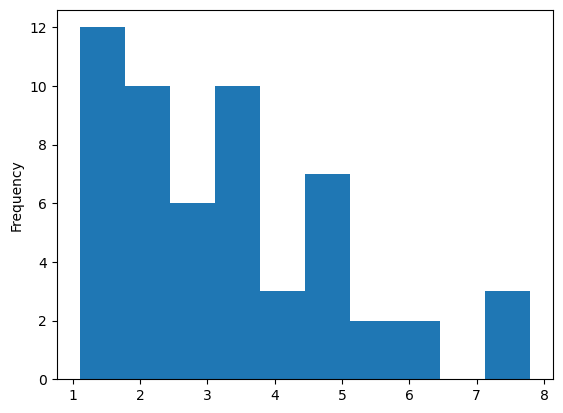

In [71]:
%matplotlib inline
df.complexity.plot.hist()

Давайте почистим текст новостей – уберем оттуда текст, не относящийся к новостям. Найдем лишнее:

In [72]:
df.full_text[0]

'Нобелиатами по\xa0физике в\xa02023 году стали Пьер Агостини (Pierre Agostini), Ференц Краус (Ferenc Krausz) и\xa0Анн Л’Юилье (Anne L’Huillier)\xa0— за\xa0экспериментальные методы генерации аттосекундных импульсов для изучения динамики электронов в\xa0веществе. За\xa0церемонией объявления победителей можно следить в\xa0прямом эфире на\xa0сайте Нобелевского комитета. Подробнее об\xa0исследованиях ученых и\xa0их\xa0заслугах можно прочитать в\xa0официальном пресс-релизе. Вручение премий состоится 10\xa0декабря в\xa0Стокгольме.\nДля атомов внутри молекул время течет очень быстро: они перемещаются и\xa0поворачиваются за\xa0считанные фемтосекунды\xa0— это 10-15\xa0секунды. Отдельные электроны внутри атомов двигаются еще быстрее: они меняют свою энергию и\xa0положение в\xa0пространстве за\xa0десятки и\xa0сотни аттосекунд, это еще на\xa0три порядка короче, чем фемтосекунда. Поэтому, чтобы за\xa0ними наблюдать\xa0— или хотя\xa0бы фиксировать изменение их\xa0энергии,\xa0— нужно уметь действовать

Лишний текст находится после фразы 'Нашли опечатку?'. Так давайте будем разбивать строки по этой фразе с помощью метода `.split()` и брать все, что до нее (элемент с индексом 0).

In [73]:
df['clean_text'] = [t.split('Нашли опечатку?')[0] for t in df.full_text]

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [74]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.clean_text]

In [75]:
df.clean_text[0]

'Нобелиатами по физике в 2023 году стали Пьер Агостини (Pierre Agostini), Ференц Краус (Ferenc Krausz) и Анн Л’Юилье (Anne L’Huillier) — за экспериментальные методы генерации аттосекундных импульсов для изучения динамики электронов в веществе. За церемонией объявления победителей можно следить в прямом эфире на сайте Нобелевского комитета. Подробнее об исследованиях ученых и их заслугах можно прочитать в официальном пресс-релизе. Вручение премий состоится 10 декабря в Стокгольме.\nДля атомов внутри молекул время течет очень быстро: они перемещаются и поворачиваются за считанные фемтосекунды — это 10-15 секунды. Отдельные электроны внутри атомов двигаются еще быстрее: они меняют свою энергию и положение в пространстве за десятки и сотни аттосекунд, это еще на три порядка короче, чем фемтосекунда. Поэтому, чтобы за ними наблюдать — или хотя бы фиксировать изменение их энергии, — нужно уметь действовать на них точечно, и воздействие должно быть таким же быстрым, как и движение самих элект

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [76]:
df.to_excel('nplus-news.xlsx')